# Operations before start

## Importing packages

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from linearmodels import PanelOLS

# Data manipulation

## Set working directory

In [3]:
%cd /Users/inuqy/Downloads/

/Users/inuqy/Downloads


## Reading US, DE datasets from Excel files

In [4]:
# Read excel DE_M.xlsx
DE_M = pd.read_excel('DE_M.xlsx', sheet_name='DE_M')
DE_M.head()

,Date,ISIN,Returns,STDDEV,TNA,SFDR,FundAge
0,2024-01-01,DE0009848119,0.017567,0.028112,17608.28,8,20.693151
1,2024-01-01,DE000A1C81G1,0.023224,0.038007,17744.39,6,8.427397
2,2024-01-01,DE0009809566,0.002079,0.000976,18472.10,8,26.964384
3,2024-01-01,DE0009807016,0.002290,0.001990,17276.28,8,51.769863
4,2024-01-01,DE0009805507,0.002300,0.000898,16697.53,8,57.542466


In [5]:
# Check the data types of the columns
DE_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96768 entries, 0 to 96767
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     96768 non-null  datetime64[ns]
 1   ISIN     96768 non-null  object        
 2   Returns  79854 non-null  float64       
 3   STDDEV   49688 non-null  float64       
 4   TNA      79069 non-null  float64       
 5   SFDR     96768 non-null  int64         
 6   FundAge  80509 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 5.2+ MB


In [6]:
# Read excel US_M.xlsx
US_M = pd.read_excel('US_M_correct.xlsx', sheet_name='US_M')
US_M

,Date,ISIN,Returns,STDDEV,TNA,SFDR,FundAge
0,2024-01-01,US19765J7643,0.051450,0.051364,270.7429,0,21.684932
1,2024-01-01,US70432R2004,-0.014175,0.018528,72.3685,0,15.284932
2,2024-01-01,US7043293668,0.014283,0.019626,134.8499,0,14.816438
3,2024-01-01,US9576638830,0.002025,0.023299,9.6635,0,22.852055
4,2024-01-01,US64128K8430,-0.000673,0.016689,7.6317,0,36.506849
...,...,...,...,...,...,...,...
106807,2015-02-01,US67065R7623,0.089142,NaN,256.2779,0,29.619178
106808,2015-02-01,US30254T7596,0.053497,NaN,17360.7852,0,21.682192
106809,2015-02-01,US70469B1026,NaN,NaN,NaN,0,115.167123
106810,2015-02-01,US94984B5536,0.045109,NaN,54.8348,0,7.131507


## Merging datasets US monthly and DE monthly to create a single dataset DATA_M

In [256]:
# Concat DE_M and US_M
DATA_M = pd.concat([DE_M, US_M])
DATA_M

,Date,ISIN,Returns,STDDEV,TNA,SFDR,FundAge
0,2024-01-01,DE0009848119,0.017567,0.028112,17608.2800,8,20.693151
1,2024-01-01,DE000A1C81G1,0.023224,0.038007,17744.3900,6,8.427397
2,2024-01-01,DE0009809566,0.002079,0.000976,18472.1000,8,26.964384
3,2024-01-01,DE0009807016,0.002290,0.001990,17276.2800,8,51.769863
4,2024-01-01,DE0009805507,0.002300,0.000898,16697.5300,8,57.542466
...,...,...,...,...,...,...,...
106807,2015-02-01,US67065R7623,0.089142,NaN,256.2779,0,29.619178
106808,2015-02-01,US30254T7596,0.053497,NaN,17360.7852,0,21.682192
106809,2015-02-01,US70469B1026,NaN,NaN,NaN,0,115.167123
106810,2015-02-01,US94984B5536,0.045109,NaN,54.8348,0,7.131507


## Expanding the dataset with dummy variables, variable calculations, etc.

In [257]:
# Add a new column 'lag_TNA' to DATA_M in respect of 'ISIN'
DATA_M['lag_TNA'] = DATA_M.groupby('ISIN')['TNA'].shift(-1)
DATA_M

,Date,ISIN,Returns,STDDEV,TNA,SFDR,FundAge,lag_TNA
0,2024-01-01,DE0009848119,0.017567,0.028112,17608.2800,8,20.693151,17263.07
1,2024-01-01,DE000A1C81G1,0.023224,0.038007,17744.3900,6,8.427397,17122.74
2,2024-01-01,DE0009809566,0.002079,0.000976,18472.1000,8,26.964384,18457.29
3,2024-01-01,DE0009807016,0.002290,0.001990,17276.2800,8,51.769863,17358.73
4,2024-01-01,DE0009805507,0.002300,0.000898,16697.5300,8,57.542466,16683.88
...,...,...,...,...,...,...,...,...
106807,2015-02-01,US67065R7623,0.089142,NaN,256.2779,0,29.619178,NaN
106808,2015-02-01,US30254T7596,0.053497,NaN,17360.7852,0,21.682192,NaN
106809,2015-02-01,US70469B1026,NaN,NaN,NaN,0,115.167123,NaN
106810,2015-02-01,US94984B5536,0.045109,NaN,54.8348,0,7.131507,NaN


In [258]:
# Add a new column 'Flow' to DATA_M where 'Flow' = ('TNA' - 'lag_TNA' * (1 + 'Returns')) / 'lag_TNA'
DATA_M['Flow'] = (DATA_M['TNA'] - DATA_M['lag_TNA'] * (1 + DATA_M['Returns'])) / DATA_M['lag_TNA']
DATA_M

,Date,ISIN,Returns,STDDEV,TNA,SFDR,FundAge,lag_TNA,Flow
0,2024-01-01,DE0009848119,0.017567,0.028112,17608.2800,8,20.693151,17263.07,0.002430
1,2024-01-01,DE000A1C81G1,0.023224,0.038007,17744.3900,6,8.427397,17122.74,0.013081
2,2024-01-01,DE0009809566,0.002079,0.000976,18472.1000,8,26.964384,18457.29,-0.001277
3,2024-01-01,DE0009807016,0.002290,0.001990,17276.2800,8,51.769863,17358.73,-0.007040
4,2024-01-01,DE0009805507,0.002300,0.000898,16697.5300,8,57.542466,16683.88,-0.001481
...,...,...,...,...,...,...,...,...,...
106807,2015-02-01,US67065R7623,0.089142,NaN,256.2779,0,29.619178,NaN,NaN
106808,2015-02-01,US30254T7596,0.053497,NaN,17360.7852,0,21.682192,NaN,NaN
106809,2015-02-01,US70469B1026,NaN,NaN,NaN,0,115.167123,NaN,NaN
106810,2015-02-01,US94984B5536,0.045109,NaN,54.8348,0,7.131507,NaN,NaN


In [259]:
# Add a new column 'Event' to DATA_M where 'Period' should be 1 if the date is 2022-01-01 or bigger, otherwise 0
DATA_M['Event'] = np.where(DATA_M['Date'] >= '2021-03-01', 1, 0)
DATA_M.head()

,Date,ISIN,Returns,STDDEV,TNA,SFDR,FundAge,lag_TNA,Flow,Event
0,2024-01-01,DE0009848119,0.017567,0.028112,17608.28,8,20.693151,17263.07,0.002430,1
1,2024-01-01,DE000A1C81G1,0.023224,0.038007,17744.39,6,8.427397,17122.74,0.013081,1
2,2024-01-01,DE0009809566,0.002079,0.000976,18472.10,8,26.964384,18457.29,-0.001277,1
3,2024-01-01,DE0009807016,0.002290,0.001990,17276.28,8,51.769863,17358.73,-0.007040,1
4,2024-01-01,DE0009805507,0.002300,0.000898,16697.53,8,57.542466,16683.88,-0.001481,1


In [260]:
# Add a new column 'DE' and if 'ISIN' begins with 'DE', then 'DE' = 1, otherwise 0
DATA_M['DE'] = np.where(DATA_M['ISIN'].str.startswith('DE'), 1, 0)
DATA_M

,Date,ISIN,Returns,STDDEV,TNA,SFDR,FundAge,lag_TNA,Flow,Event,DE
0,2024-01-01,DE0009848119,0.017567,0.028112,17608.2800,8,20.693151,17263.07,0.002430,1,1
1,2024-01-01,DE000A1C81G1,0.023224,0.038007,17744.3900,6,8.427397,17122.74,0.013081,1,1
2,2024-01-01,DE0009809566,0.002079,0.000976,18472.1000,8,26.964384,18457.29,-0.001277,1,1
3,2024-01-01,DE0009807016,0.002290,0.001990,17276.2800,8,51.769863,17358.73,-0.007040,1,1
4,2024-01-01,DE0009805507,0.002300,0.000898,16697.5300,8,57.542466,16683.88,-0.001481,1,1
...,...,...,...,...,...,...,...,...,...,...,...
106807,2015-02-01,US67065R7623,0.089142,NaN,256.2779,0,29.619178,NaN,NaN,0,0
106808,2015-02-01,US30254T7596,0.053497,NaN,17360.7852,0,21.682192,NaN,NaN,0,0
106809,2015-02-01,US70469B1026,NaN,NaN,NaN,0,115.167123,NaN,NaN,0,0
106810,2015-02-01,US94984B5536,0.045109,NaN,54.8348,0,7.131507,NaN,NaN,0,0


In [261]:
# Add a new column 'lag_FundAge' to DATA_M in respect of 'ISIN'
DATA_M['lag_FundAge'] = DATA_M.groupby('ISIN')['FundAge'].shift(-1)
DATA_M

,Date,ISIN,Returns,STDDEV,TNA,SFDR,FundAge,lag_TNA,Flow,Event,DE,lag_FundAge
0,2024-01-01,DE0009848119,0.017567,0.028112,17608.2800,8,20.693151,17263.07,0.002430,1,1,20.608219
1,2024-01-01,DE000A1C81G1,0.023224,0.038007,17744.3900,6,8.427397,17122.74,0.013081,1,1,8.342466
2,2024-01-01,DE0009809566,0.002079,0.000976,18472.1000,8,26.964384,18457.29,-0.001277,1,1,26.879452
3,2024-01-01,DE0009807016,0.002290,0.001990,17276.2800,8,51.769863,17358.73,-0.007040,1,1,51.684932
4,2024-01-01,DE0009805507,0.002300,0.000898,16697.5300,8,57.542466,16683.88,-0.001481,1,1,57.457534
...,...,...,...,...,...,...,...,...,...,...,...,...
106807,2015-02-01,US67065R7623,0.089142,NaN,256.2779,0,29.619178,NaN,NaN,0,0,NaN
106808,2015-02-01,US30254T7596,0.053497,NaN,17360.7852,0,21.682192,NaN,NaN,0,0,NaN
106809,2015-02-01,US70469B1026,NaN,NaN,NaN,0,115.167123,NaN,NaN,0,0,NaN
106810,2015-02-01,US94984B5536,0.045109,NaN,54.8348,0,7.131507,NaN,NaN,0,0,NaN


In [262]:
# Add a new column 'lag_Returns' to DATA_M in respect of 'ISIN'
DATA_M['lag_Returns'] = DATA_M.groupby('ISIN')['Returns'].shift(-1)
DATA_M

,Date,ISIN,Returns,STDDEV,TNA,SFDR,FundAge,lag_TNA,Flow,Event,DE,lag_FundAge,lag_Returns
0,2024-01-01,DE0009848119,0.017567,0.028112,17608.2800,8,20.693151,17263.07,0.002430,1,1,20.608219,0.023653
1,2024-01-01,DE000A1C81G1,0.023224,0.038007,17744.3900,6,8.427397,17122.74,0.013081,1,1,8.342466,0.052101
2,2024-01-01,DE0009809566,0.002079,0.000976,18472.1000,8,26.964384,18457.29,-0.001277,1,1,26.879452,0.003090
3,2024-01-01,DE0009807016,0.002290,0.001990,17276.2800,8,51.769863,17358.73,-0.007040,1,1,51.684932,0.001374
4,2024-01-01,DE0009805507,0.002300,0.000898,16697.5300,8,57.542466,16683.88,-0.001481,1,1,57.457534,0.003234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106807,2015-02-01,US67065R7623,0.089142,NaN,256.2779,0,29.619178,NaN,NaN,0,0,NaN,NaN
106808,2015-02-01,US30254T7596,0.053497,NaN,17360.7852,0,21.682192,NaN,NaN,0,0,NaN,NaN
106809,2015-02-01,US70469B1026,NaN,NaN,NaN,0,115.167123,NaN,NaN,0,0,NaN,NaN
106810,2015-02-01,US94984B5536,0.045109,NaN,54.8348,0,7.131507,NaN,NaN,0,0,NaN,NaN


In [263]:
# Add a new column 'ln_lag_TNA' to DATA_M in respect of 'ISIN'
DATA_M['ln_lag_TNA'] = np.log(DATA_M['lag_TNA'])
DATA_M

/Users/inuqy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,ISIN,Returns,STDDEV,TNA,SFDR,FundAge,lag_TNA,Flow,Event,DE,lag_FundAge,lag_Returns,ln_lag_TNA
0,2024-01-01,DE0009848119,0.017567,0.028112,17608.2800,8,20.693151,17263.07,0.002430,1,1,20.608219,0.023653,9.756325
1,2024-01-01,DE000A1C81G1,0.023224,0.038007,17744.3900,6,8.427397,17122.74,0.013081,1,1,8.342466,0.052101,9.748163
2,2024-01-01,DE0009809566,0.002079,0.000976,18472.1000,8,26.964384,18457.29,-0.001277,1,1,26.879452,0.003090,9.823215
3,2024-01-01,DE0009807016,0.002290,0.001990,17276.2800,8,51.769863,17358.73,-0.007040,1,1,51.684932,0.001374,9.761851
4,2024-01-01,DE0009805507,0.002300,0.000898,16697.5300,8,57.542466,16683.88,-0.001481,1,1,57.457534,0.003234,9.722198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106807,2015-02-01,US67065R7623,0.089142,NaN,256.2779,0,29.619178,NaN,NaN,0,0,NaN,NaN,NaN
106808,2015-02-01,US30254T7596,0.053497,NaN,17360.7852,0,21.682192,NaN,NaN,0,0,NaN,NaN,NaN
106809,2015-02-01,US70469B1026,NaN,NaN,NaN,0,115.167123,NaN,NaN,0,0,NaN,NaN,NaN
106810,2015-02-01,US94984B5536,0.045109,NaN,54.8348,0,7.131507,NaN,NaN,0,0,NaN,NaN,NaN


In [264]:
# Add EventMonth to DATA_M_indexed where EventMonth = 1 if the Date is 2022-02-01, otherwise 0
DATA_M['EventMonth'] = np.where(DATA_M['Date'] == '2021-03-01', 1, 0)
# Add EventYear to DATA_M_indexed where EventYear = 1 if the Date is 2021-03-01 till 2022-03-01, otherwise 0
DATA_M['EventYear'] = np.where((DATA_M['Date'] >= '2021-03-01') & (DATA_M['Date'] <= '2022-03-01'), 1, 0)

In [265]:
# Replace infs and -infs with nothing
DATA_M = DATA_M.replace([np.inf, -np.inf], np.nan)

In [266]:
# Create a copy of DATA_M
DATA_M_corr = DATA_M.copy()

In [18]:
# Add dummy variables for 'SFDR'
DATA_M = pd.get_dummies(DATA_M, columns=['SFDR'], drop_first=True)
DATA_M

,Date,ISIN,Returns,STDDEV,TNA,FundAge,lag_TNA,Flow,Event,DE,lag_FundAge,lag_Returns,ln_lag_TNA,EventMonth,EventYear,SFDR_6,SFDR_8,SFDR_9
0,2024-01-01,DE0009848119,0.017567,0.028112,17608.2800,20.693151,17263.07,0.002430,1,1,20.608219,0.023653,9.756325,0,0,0,1,0
1,2024-01-01,DE000A1C81G1,0.023224,0.038007,17744.3900,8.427397,17122.74,0.013081,1,1,8.342466,0.052101,9.748163,0,0,1,0,0
2,2024-01-01,DE0009809566,0.002079,0.000976,18472.1000,26.964384,18457.29,-0.001277,1,1,26.879452,0.003090,9.823215,0,0,0,1,0
3,2024-01-01,DE0009807016,0.002290,0.001990,17276.2800,51.769863,17358.73,-0.007040,1,1,51.684932,0.001374,9.761851,0,0,0,1,0
4,2024-01-01,DE0009805507,0.002300,0.000898,16697.5300,57.542466,16683.88,-0.001481,1,1,57.457534,0.003234,9.722198,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106807,2015-02-01,US67065R7623,0.089142,NaN,256.2779,29.619178,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0
106808,2015-02-01,US30254T7596,0.053497,NaN,17360.7852,21.682192,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0
106809,2015-02-01,US70469B1026,NaN,NaN,NaN,115.167123,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0
106810,2015-02-01,US94984B5536,0.045109,NaN,54.8348,7.131507,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0


# Average German fund, plots for it

In [7]:
# Make a new dataset from DE_M for one average fund and so that Date stays as a column
DE_M_avg = DE_M.groupby('Date').mean()
DE_M_avg.reset_index(inplace=True)
DE_M_avg

,Date,Returns,STDDEV,TNA,SFDR,FundAge,lag_TNA,Flow
0,2015-02-01,0.038765,NaN,480.788566,6.947545,13.816253,NaN,NaN
1,2015-03-01,0.035017,NaN,493.787630,6.947545,13.821413,480.788566,0.032636
2,2015-04-01,0.016750,NaN,502.935808,6.947545,13.882540,493.787630,0.011209
3,2015-05-01,-0.006443,NaN,498.539251,6.947545,13.822500,502.935808,0.012556
4,2015-06-01,0.006393,NaN,498.343005,6.947545,13.860548,498.539251,0.010187
...,...,...,...,...,...,...,...,...
103,2023-09-01,-0.007531,0.028248,549.562415,6.947545,16.114145,555.670463,-0.002156
104,2023-10-01,-0.017790,0.028369,541.717958,6.947545,16.160206,549.562415,0.004283
105,2023-11-01,-0.014618,0.028340,530.543303,6.947545,16.208872,541.717958,0.027719
106,2023-12-01,0.043105,0.027672,546.927306,6.947545,16.272935,530.543303,0.009994


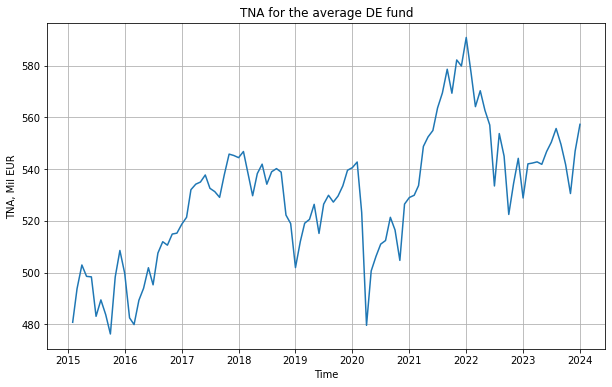

In [8]:
# Create a timeline for TNA for the average fund
plt.figure(figsize=(10,6))
plt.plot(DE_M_avg['Date'], DE_M_avg['TNA'])
plt.title('TNA for the average DE fund')
plt.xlabel('Time')
plt.ylabel('TNA, Mil EUR')
plt.grid()
plt.show()

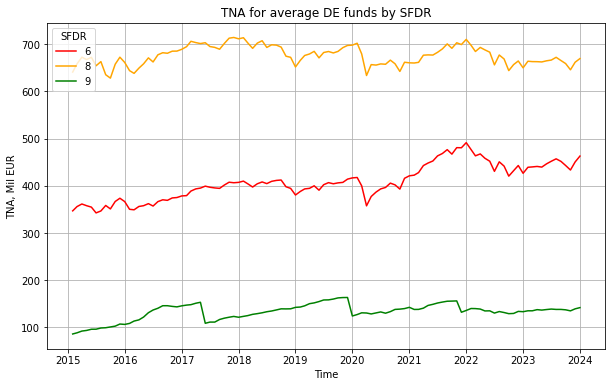

In [9]:
custom_palette = ['red', 'orange', 'green']
# Create a timeline for TNA from GE_M with hue='SFDR'
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='TNA', hue='SFDR', data=DE_M, palette=custom_palette, ci=None)
plt.title('TNA for average DE funds by SFDR')
plt.xlabel('Time')
plt.ylabel('TNA, Mil EUR')
plt.grid()
plt.legend(title='SFDR', loc='upper left')
plt.show()

# Time-series index setting

In [267]:
# Setting index for DATA_M_corr to ISIN and Date
DATA_M_corr = DATA_M_corr.set_index(['ISIN', 'Date'])

In [22]:
# Setting index for DATA_M to ISIN and Date
DATA_M_indexed = DATA_M.set_index(['ISIN', 'Date'])

In [23]:
# Overlook on the dataset
DATA_M_indexed

,,Returns,STDDEV,TNA,FundAge,lag_TNA,Flow,Event,DE,lag_FundAge,lag_Returns,ln_lag_TNA,EventMonth,EventYear,SFDR_6,SFDR_8,SFDR_9
ISIN,Date,,,,,,,,,,,,,,,,
DE0009848119,2024-01-01,0.017567,0.028112,17608.2800,20.693151,17263.07,0.002430,1,1,20.608219,0.023653,9.756325,0,0,0,1,0
DE000A1C81G1,2024-01-01,0.023224,0.038007,17744.3900,8.427397,17122.74,0.013081,1,1,8.342466,0.052101,9.748163,0,0,1,0,0
DE0009809566,2024-01-01,0.002079,0.000976,18472.1000,26.964384,18457.29,-0.001277,1,1,26.879452,0.003090,9.823215,0,0,0,1,0
DE0009807016,2024-01-01,0.002290,0.001990,17276.2800,51.769863,17358.73,-0.007040,1,1,51.684932,0.001374,9.761851,0,0,0,1,0
DE0009805507,2024-01-01,0.002300,0.000898,16697.5300,57.542466,16683.88,-0.001481,1,1,57.457534,0.003234,9.722198,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US67065R7623,2015-02-01,0.089142,NaN,256.2779,29.619178,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0
US30254T7596,2015-02-01,0.053497,NaN,17360.7852,21.682192,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0
US70469B1026,2015-02-01,NaN,NaN,NaN,115.167123,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0


In [250]:
# Show how many time periods there are for each fund
print(DATA_M_indexed.groupby('ISIN').size())
# Show how many funds there are for each time period
print(DATA_M_indexed.groupby('Date').size())

ISIN
DE0001619997    108
DE0002544483    108
DE0002605326    108
DE0004156302    108
DE0005111025    108
               ... 
US97181C3328    108
US97181C7469    108
US9718972022    108
US98148K3260    108
US98888G6008    108
Length: 1885, dtype: int64
Date
2015-02-01    1885
2015-03-01    1885
2015-04-01    1885
2015-05-01    1885
2015-06-01    1885
              ... 
2023-09-01    1885
2023-10-01    1885
2023-11-01    1885
2023-12-01    1885
2024-01-01    1885
Length: 108, dtype: int64


# Data analysis

## Missing data

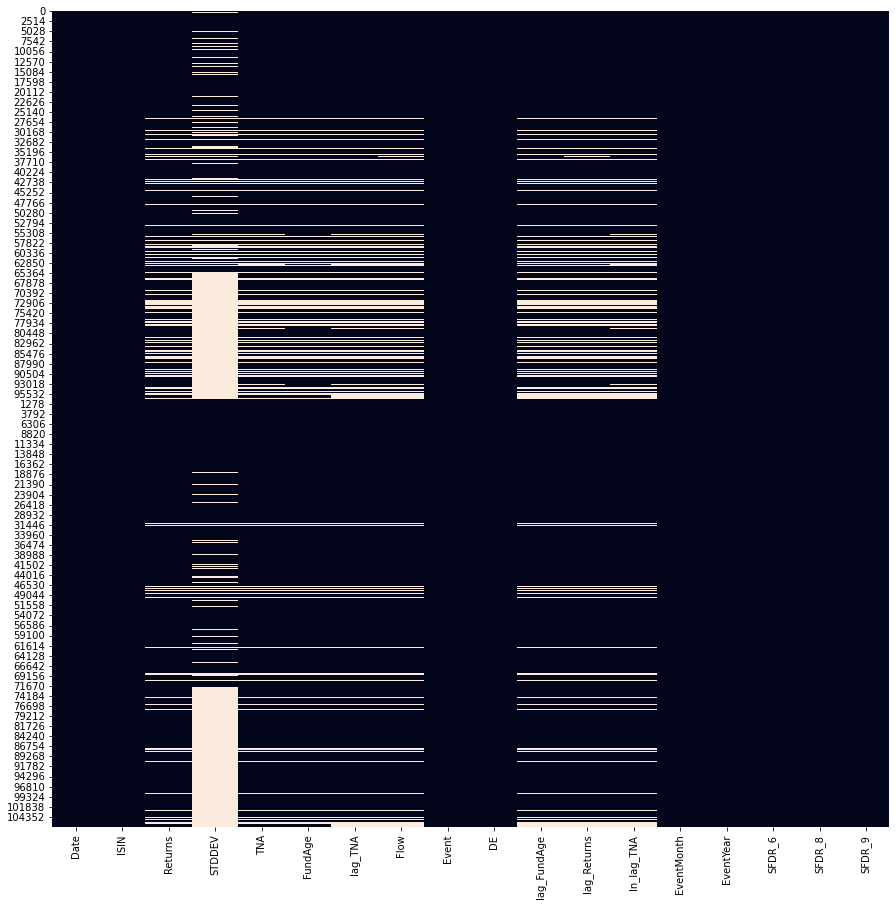

In [89]:
# Visualization with a heatmap to see where the data is missing
plt.figure(figsize=(15, 15))
sns.heatmap(DATA_M.isnull(), cbar=False);

## Outlier check

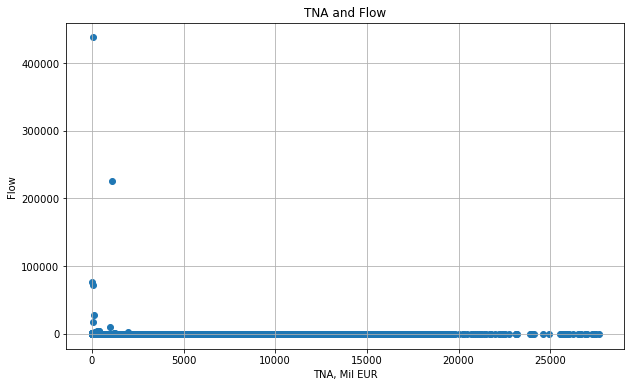

In [261]:
 # Create a scatterplot for 'TNA' and 'Flow'
plt.figure(figsize=(10,6))
plt.scatter(DATA_M['TNA'], DATA_M['Flow'])
plt.title('TNA and Flow')
plt.xlabel('TNA, Mil EUR')
plt.ylabel('Flow')
plt.grid()
plt.show()

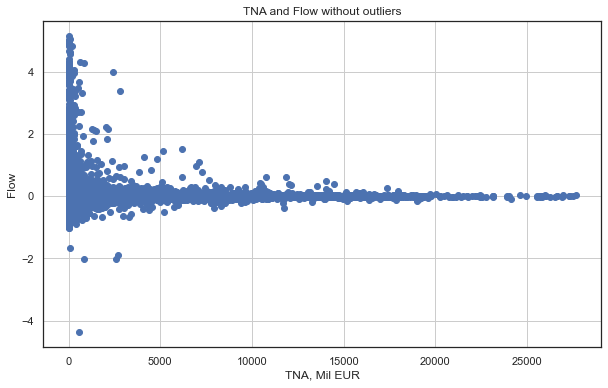

In [253]:
# Create a new dataset DATA_M copy
DATA_M_outliers = DATA_M.copy()
# Remove outliers from 'Flow' column in 90% quantile
DATA_M_outliers = DATA_M_outliers[DATA_M_outliers['Flow'] < DATA_M_outliers['Flow'].quantile(0.999)]
# Remove 'Flow' outlier that is below -100
DATA_M_outliers = DATA_M_outliers[DATA_M_outliers['Flow'] > -5]
# Create a scatterplot for 'TNA' and 'Flow' without outliers
plt.figure(figsize=(10,6))
plt.scatter(DATA_M_outliers['TNA'], DATA_M_outliers['Flow'])
plt.title('TNA and Flow without outliers')
plt.xlabel('TNA, Mil EUR')
plt.ylabel('Flow')
plt.grid()
plt.show()


## Density check

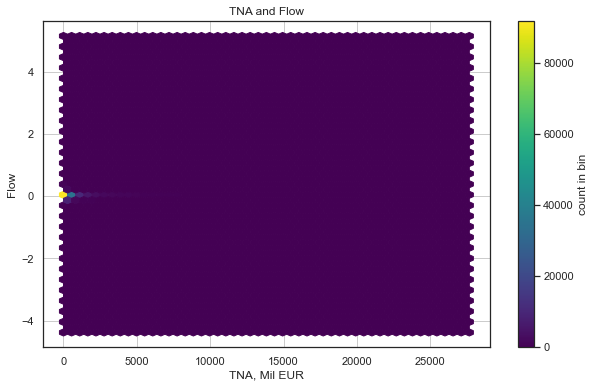

In [232]:
# Create a density colormap
plt.figure(figsize=(10,6))
plt.hexbin(DATA_M_outliers['TNA'], DATA_M_outliers['Flow'], gridsize=50, cmap='viridis')
plt.colorbar(label='count in bin')
plt.title('TNA and Flow')
plt.xlabel('TNA, Mil EUR')
plt.ylabel('Flow')
plt.grid()
plt.show()

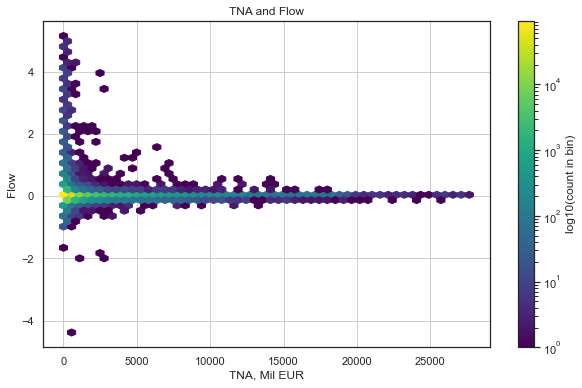

In [248]:
# Use log for bins to make it more viewable
plt.figure(figsize=(10,6))
plt.hexbin(DATA_M_outliers['TNA'], DATA_M_outliers['Flow'], gridsize=50, cmap='viridis', bins='log')
plt.colorbar(label='log10(count in bin)')
plt.title('TNA and Flow')
plt.xlabel('TNA, Mil EUR')
plt.ylabel('Flow')
plt.grid()
plt.show()


## Making an independent dataset without outliers

In [254]:
# Set indexes for filtered dataset without outliers
DATA_M_outliers = DATA_M_outliers.set_index(['ISIN', 'Date'])
DATA_M_outliers

,,Returns,STDDEV,TNA,FundAge,lag_TNA,Flow,Event,DE,lag_FundAge,lag_Returns,ln_lag_TNA,EventMonth,EventYear,SFDR_6,SFDR_8,SFDR_9
ISIN,Date,,,,,,,,,,,,,,,,
DE0009848119,2024-01-01,0.017567,0.028112,17608.2800,20.693151,17263.0700,0.002430,1,1,20.608219,0.023653,9.756325,0,0,0,1,0
DE000A1C81G1,2024-01-01,0.023224,0.038007,17744.3900,8.427397,17122.7400,0.013081,1,1,8.342466,0.052101,9.748163,0,0,1,0,0
DE0009809566,2024-01-01,0.002079,0.000976,18472.1000,26.964384,18457.2900,-0.001277,1,1,26.879452,0.003090,9.823215,0,0,0,1,0
DE0009807016,2024-01-01,0.002290,0.001990,17276.2800,51.769863,17358.7300,-0.007040,1,1,51.684932,0.001374,9.761851,0,0,0,1,0
DE0009805507,2024-01-01,0.002300,0.000898,16697.5300,57.542466,16683.8800,-0.001481,1,1,57.457534,0.003234,9.722198,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US19766H6190,2015-03-01,0.070542,NaN,292.6303,17.860274,268.2676,0.020273,0,0,17.783562,0.031319,5.591985,0,0,0,0,0
US67065R7623,2015-03-01,0.000026,NaN,255.7389,29.695890,256.2779,-0.002129,0,0,29.619178,0.089142,5.546262,0,0,0,0,0
US30254T7596,2015-03-01,0.045167,NaN,18295.4641,21.758904,17360.7852,0.008671,0,0,21.682192,0.053497,9.761969,0,0,0,0,0


In [213]:
# Filter outlier dataset for DE funds and make it as a copy
DE_funds = DATA_M_outliers[DATA_M_outliers['DE'] == 1].copy()
DE_funds

,,Returns,STDDEV,TNA,FundAge,lag_TNA,Flow,Event,DE,lag_FundAge,lag_Returns,ln_lag_TNA,EventMonth,EventYear,SFDR_6,SFDR_8,SFDR_9
ISIN,Date,,,,,,,,,,,,,,,,
DE0009848119,2024-01-01,0.017567,0.028112,17608.280,20.693151,17263.070,0.002430,1,1,20.608219,0.023653,9.756325,0,0,0,1,0
DE000A1C81G1,2024-01-01,0.023224,0.038007,17744.390,8.427397,17122.740,0.013081,1,1,8.342466,0.052101,9.748163,0,0,1,0,0
DE0009809566,2024-01-01,0.002079,0.000976,18472.100,26.964384,18457.290,-0.001277,1,1,26.879452,0.003090,9.823215,0,0,0,1,0
DE0009807016,2024-01-01,0.002290,0.001990,17276.280,51.769863,17358.730,-0.007040,1,1,51.684932,0.001374,9.761851,0,0,0,1,0
DE0009805507,2024-01-01,0.002300,0.000898,16697.530,57.542466,16683.880,-0.001481,1,1,57.457534,0.003234,9.722198,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DE000A1CXUT2,2015-03-01,0.001074,NaN,18.468,3.917808,18.262,0.010206,0,1,3.841096,-0.008626,2.904822,0,0,1,0,0
DE000A1T75R4,2015-03-01,0.007192,NaN,24.370,1.271233,23.656,0.022991,0,1,1.194521,0.038830,3.163617,0,0,1,0,0
DE000DK1CJM2,2015-03-01,0.015111,NaN,159.092,6.161644,156.417,0.001991,0,1,6.084932,0.018737,5.052526,0,0,1,0,0


## Correlation matrixes

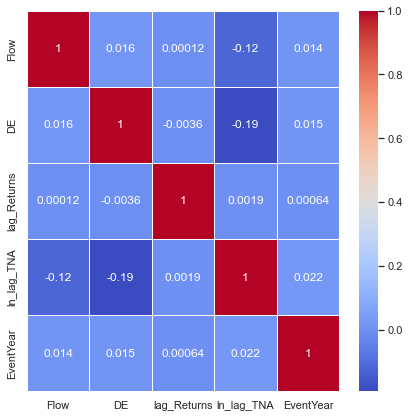

In [212]:
# Create a copy of DATA_M
DATA_M_corrfull = DATA_M_outliers.copy()
# Create a correlation matrix and drop the columns 'Returns', 'STDDEV', 'TNA', 'FundAge', 'lag_FundAge', 'EventMonth', 'Event', 'lag_TNA', 'SFDR_6', 'SFDR_8', 'SFDR_9'
DATA_M_corrfull = DATA_M_corrfull.drop(['Returns', 'STDDEV', 'TNA', 'FundAge', 'lag_FundAge', 'EventMonth', 'Event', 'lag_TNA', 'SFDR_6', 'SFDR_8', 'SFDR_9'], axis=1)
corr = DATA_M_corrfull.corr()
# Create a heatmap for the correlation matrix
plt.figure(figsize=(7, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5);

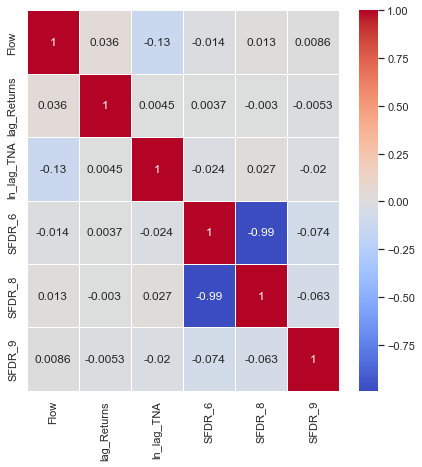

In [216]:
# Create a copy of DE_funds
DATA_M_corrDE = DE_funds.copy()
# Create a correlation matrix and drop the columns 'Returns', 'STDDEV', 'TNA', 'FundAge', 'lag_FundAge', 'EventMonth', 'Event', 'lag_TNA', 'EventYear', 'DE'
DATA_M_corrDE = DATA_M_corrDE.drop(['Returns', 'STDDEV', 'TNA', 'FundAge', 'lag_FundAge', 'EventMonth', 'Event', 'lag_TNA', 'EventYear', 'DE'], axis=1)
corr = DATA_M_corrDE.corr()
# Create a heatmap for the correlation matrix
plt.figure(figsize=(7, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5);

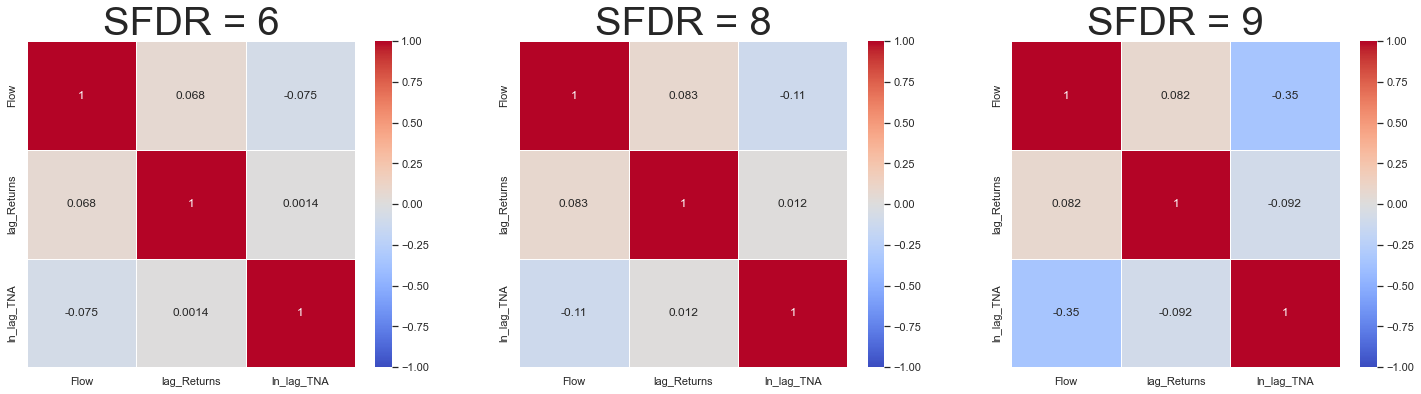

In [276]:
# Remove outliers from 'Flow' column in 90% quantile
DATA_M_corr = DATA_M_corr[DATA_M_corr['Flow'] < DATA_M_corr['Flow'].quantile(0.999)]
# Remove 'Flow' outlier that is below -100
DATA_M_corr = DATA_M_corr[DATA_M_corr['Flow'] > -5]
# Remove SFDR, DE, Event, EventMonth from the heatmaps
corr1 = DATA_M_corr[DATA_M_corr['SFDR'] == 6].drop(['SFDR', 'DE', 'Event', 'EventMonth', 'lag_FundAge', 'STDDEV', 'TNA', 'FundAge', 'Returns', 'EventYear', 'lag_TNA'], axis=1).corr()
corr2 = DATA_M_corr[DATA_M_corr['SFDR'] == 8].drop(['SFDR', 'DE', 'Event', 'EventMonth', 'lag_FundAge', 'STDDEV', 'TNA', 'FundAge', 'Returns', 'EventYear', 'lag_TNA'], axis=1).corr()
corr3 = DATA_M_corr[DATA_M_corr['SFDR'] == 9].drop(['SFDR', 'DE', 'Event', 'EventMonth', 'lag_FundAge', 'STDDEV', 'TNA', 'FundAge', 'Returns', 'EventYear', 'lag_TNA'], axis=1).corr()
# Create heatmaps for the correlation matrixes and use scale from -1 to 1
fig, ax = plt.subplots(1, 3, figsize=(25, 6))
sns.heatmap(corr1, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax[0], vmin=-1, vmax=1);
sns.heatmap(corr2, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax[1], vmin=-1, vmax=1);
sns.heatmap(corr3, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax[2], vmin=-1, vmax=1);
ax[0].set_title('SFDR = 6');
ax[1].set_title('SFDR = 8');
ax[2].set_title('SFDR = 9');
for i in range(3):
    ax[i].title.set_fontsize(40)
plt.show()

## Covariance matrix

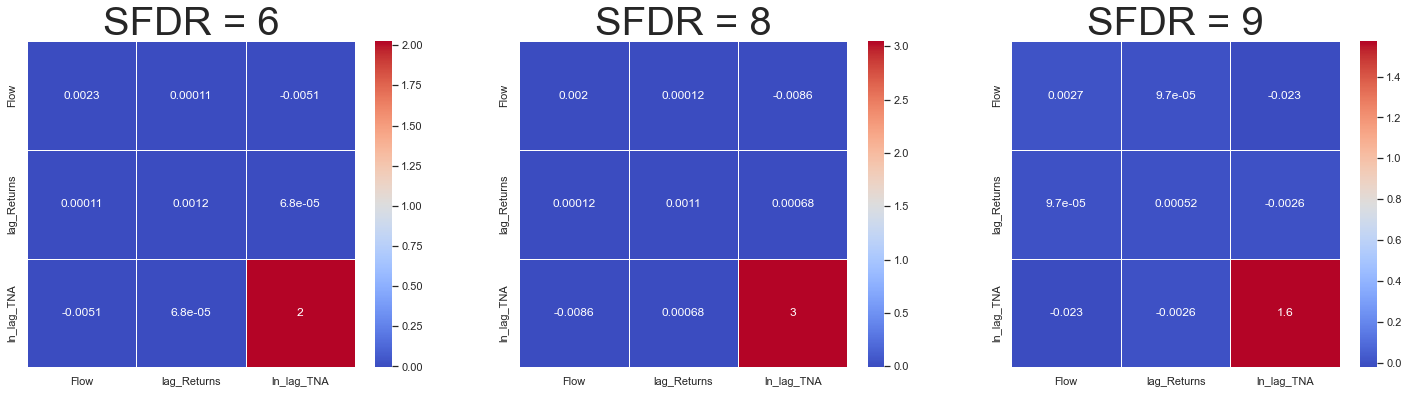

In [277]:
# Create covariance matrixes for different SFDR values from dataset DATA_M_corr and create heatmaps for them
cov1 = DATA_M_corr[DATA_M_corr['SFDR'] == 6].drop(['SFDR', 'DE', 'Event', 'EventMonth', 'lag_FundAge', 'STDDEV', 'TNA', 'FundAge', 'Returns', 'EventYear', 'lag_TNA'], axis=1).cov()
cov2 = DATA_M_corr[DATA_M_corr['SFDR'] == 8].drop(['SFDR', 'DE', 'Event', 'EventMonth', 'lag_FundAge', 'STDDEV', 'TNA', 'FundAge', 'Returns', 'EventYear', 'lag_TNA'], axis=1).cov()
cov3 = DATA_M_corr[DATA_M_corr['SFDR'] == 9].drop(['SFDR', 'DE', 'Event', 'EventMonth', 'lag_FundAge', 'STDDEV', 'TNA', 'FundAge', 'Returns', 'EventYear', 'lag_TNA'], axis=1).cov()
# Create heatmaps for the covariance matrixes
fig, ax = plt.subplots(1, 3, figsize=(25, 6))
sns.heatmap(cov1, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax[0]);
sns.heatmap(cov2, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax[1]);
sns.heatmap(cov3, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax[2]);
ax[0].set_title('SFDR = 6');
ax[1].set_title('SFDR = 8');
ax[2].set_title('SFDR = 9');
for i in range(3):
    ax[i].title.set_fontsize(40)
plt.show()

# Regressions

In [181]:
# First model
model = PanelOLS.from_formula('Flow ~ DE:EventYear + ln_lag_TNA + lag_Returns + EntityEffects + TimeEffects', data=DATA_M_outliers, drop_absorbed=True).fit(cov_type='clustered')
model

/Users/inuqy/opt/anaconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Dep. Variable:,Flow,R-squared:,0.0268
Estimator:,PanelOLS,R-squared (Between):,-9.4733
No. Observations:,175006,R-squared (Within):,0.0293
Date:,"Fri, Mar 08 2024",R-squared (Overall):,-1.9535
Time:,09:53:28,Log-likelihood,1.273e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,1587.8
Entities:,1877,P-value,0.0000
Avg Obs:,93.237,Distribution:,"F(3,173020)"
Min Obs:,1.0000,,
Max Obs:,107.00,F-statistic (robust):,128.30


In [204]:
# Second model
model2 = PanelOLS.from_formula('Flow ~ SFDR_8:EventYear + SFDR_9:EventYear + ln_lag_TNA + lag_Returns + EntityEffects + TimeEffects', data=DE_funds, drop_absorbed=True).fit(cov_type='clustered')
model2

/Users/inuqy/opt/anaconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Dep. Variable:,Flow,R-squared:,0.0426
Estimator:,PanelOLS,R-squared (Between):,-12.672
No. Observations:,77736,R-squared (Within):,0.0467
Date:,"Fri, Mar 08 2024",R-squared (Overall):,-4.4544
Time:,10:21:17,Log-likelihood,6.409e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,854.03
Entities:,888,P-value,0.0000
Avg Obs:,87.541,Distribution:,"F(4,76738)"
Min Obs:,1.0000,,
Max Obs:,107.00,F-statistic (robust):,60.148


# Scrap models

In [174]:
model = PanelOLS.from_formula('Flow ~ DE:Event + ln_lag_TNA + lag_Returns + EntityEffects + TimeEffects', data=DATA_M_outliers, drop_absorbed=True).fit(cov_type='clustered')
model

/Users/inuqy/opt/anaconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Dep. Variable:,Flow,R-squared:,0.0268
Estimator:,PanelOLS,R-squared (Between):,-9.5292
No. Observations:,175006,R-squared (Within):,0.0291
Date:,"Fri, Mar 08 2024",R-squared (Overall):,-1.9630
Time:,09:47:21,Log-likelihood,1.273e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,1586.9
Entities:,1877,P-value,0.0000
Avg Obs:,93.237,Distribution:,"F(3,173020)"
Min Obs:,1.0000,,
Max Obs:,107.00,F-statistic (robust):,132.73


In [180]:
model = PanelOLS.from_formula('Flow ~ DE:Event + DE:EventYear + ln_lag_TNA + lag_Returns + EntityEffects + TimeEffects', data=DATA_M_outliers, drop_absorbed=True).fit(cov_type='clustered')
model

/Users/inuqy/opt/anaconda3/lib/python3.9/site-packages/linearmodels/panel/model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Dep. Variable:,Flow,R-squared:,0.0268
Estimator:,PanelOLS,R-squared (Between):,-9.5370
No. Observations:,175006,R-squared (Within):,0.0296
Date:,"Fri, Mar 08 2024",R-squared (Overall):,-1.9626
Time:,09:53:19,Log-likelihood,1.273e+05
Cov. Estimator:,Clustered,,
,,F-statistic:,1192.8
Entities:,1877,P-value,0.0000
Avg Obs:,93.237,Distribution:,"F(4,173019)"
Min Obs:,1.0000,,
Max Obs:,107.00,F-statistic (robust):,101.50


In [199]:
model0 = PanelOLS.from_formula('Flow ~ SFDR_8:EventYear + SFDR_9:EventYear + EntityEffects + TimeEffects', data=DE_funds, drop_absorbed=True).fit(cov_type='clustered')
model0

Dep. Variable:,Flow,R-squared:,0.0002
Estimator:,PanelOLS,R-squared (Between):,0.0045
No. Observations:,77905,R-squared (Within):,0.0003
Date:,"Fri, Mar 08 2024",R-squared (Overall):,0.0011
Time:,10:18:00,Log-likelihood,5.65e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,5.7855
Entities:,888,P-value,0.0031
Avg Obs:,87.731,Distribution:,"F(2,76909)"
Min Obs:,2.0000,,
Max Obs:,107.00,F-statistic (robust):,6.5448
